# This notebook demonstrates a typical pipeline of running MAMP experiments

## Import

In [76]:
import numpy as np
import sys
sys.path.append('../')
from testSimWeighted import test
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simulate

In [95]:
env = 'tunnel_weighted_2'
time_pos = test(env, "../problems/{}/problem.yaml".format(env), "../problems/{}/config.yaml".format(env))


----- 0 -----
- Find Collision and Reroute
Printing Solution with Solving Time  0.031335452003986575 s
[0] [0.0, 12.0, 30.0]
[1] [12.0, 0.0, 30.0]
[2] [25.980762113533157, 0.0, 30.0]
[3] [80.98076211353316, 55.0, 30.0]
- Single-agent Feasible Plan Found
 -- Weighted flowtime 1.6196152422706633
 -- Unweighted flowtime 80.98076211353316
- Find Collision and Reroute
Printing Solution with Solving Time  0.0037791730064782314 s
[0] [0.0, 48.0, 30.0]
[1] [29.0, 19.0, 30.0]
[2] [43.0, 5.0, 30.0]
- Single-agent Feasible Plan Found
 -- Weighted flowtime 2.9096152422706636
 -- Unweighted flowtime 123.98076211353316
- Find Collision and Reroute
Printing Solution with Solving Time  0.004465872996661346 s
[0] [0.0, 12.0, 36.0]
[1] [8.696152422706628, 19.0, 30.0]
[2] [30.69615242270663, 41.0, 30.0]
[3] [44.69615242270663, 55.0, 36.0]
- Single-agent Feasible Plan Found
 -- Weighted flowtime 5.144422863405995
 -- Unweighted flowtime 168.6769145362398
- Find Collision and Reroute
Printing Solution wit

In [3]:
# times = []
# pos = []
# for agent in range(len(time_pos)):
#     times.append(np.array(time_pos[agent])[:,0])
#     pos.append(np.array(time_pos[agent])[:,1:])             

### The results of one experiment is saved in the results/ folder and include the following contents. 
* The environment(yaml)
* The configuration(yaml)
* The planned time-positions(data)
* The actual trajectory(not saved as for now)
* The figure(svg)
* The animation(mp4)

## Save Planning data

In [96]:
import yaml
import os
from problems.util import read_problem,read_configuration

In [97]:
# Save a copy of env and config data
expr_name = '{}_0'.format(env)

for file_prefix in ['problem','config']:
    with open("../problems/{}/{}.yaml".format(env,file_prefix)) as f:
        data = yaml.safe_load(f)

    filename = "../results/{}/{}.yaml".format(expr_name,file_prefix)
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, "w") as f:
        yaml.dump(data,f)

# Save the planned time-positions
filename = "../results/{}/ref.yaml".format(expr_name)
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, "w") as f:
    yaml.dump(time_pos,f)

## Generate Visualization Results

In [98]:
from algs.ref2traj import ref2traj
from viz.plot import plot_results

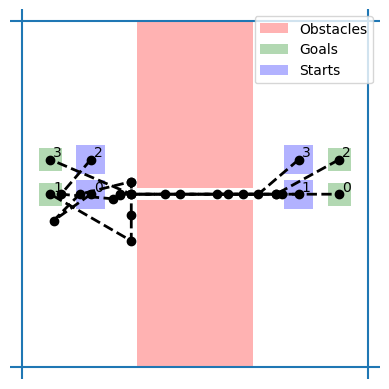

In [99]:
# Load environment and configuration 
name, limits, Obstacles, agents, Thetas, Goals,Weights = read_problem("../results/{}/problem.yaml".format(expr_name))
min_segs, max_segs, obs_steps = read_configuration("../results/{}/config.yaml".format(expr_name))

# Plot planning result

file_prefix = expr_name 
filename= "../results/{}/{}.svg".format(expr_name,file_prefix)

trajs = ref2traj(time_pos)# From the segments of PWL(waypoints) to densely interpolated 

plot_results(agents, limits, Obstacles, Thetas, Goals, trajs, name, refs=time_pos,save_to_path = filename)

In [100]:
from viz.animate_2 import animate_results
from IPython import display

In [101]:
from viz.util import extract_paths
paths = extract_paths(agents, Thetas, trajs) # From densely interpolated PWL to actual robot motion.

In [102]:
len(trajs[0][0][0])

8

In [103]:
len(paths[0][0])

103

In [104]:
# Animate the results
file_prefix = expr_name 
filename= "../results/{}/{}.mp4".format(expr_name,file_prefix)
ani = animate_results(agents,limits, Obstacles, Thetas, Goals, paths,save_to_path=filename)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()   # Avoid plotting an extra figure.
